In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bar_chart_race as bcr

In [3]:
df_full = pd.read_csv('data/tweets_users_nov_21.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [4]:
df_full['year'] = df_full['date'].dt.year
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [5]:
df_full.shape

(3405, 36)

In [6]:
df_full.head().T

,0,1,2,3,4
url_x,https://twitter.com/schisnell/status/145817632...,https://twitter.com/PodRevDay/status/145812730...,https://twitter.com/LookBehindPod/status/14580...,https://twitter.com/PodRevDay/status/145802367...,https://twitter.com/Namely90s/status/145793896...
date,2021-11-09 20:55:01+00:00,2021-11-09 17:40:15+00:00,2021-11-09 15:50:27+00:00,2021-11-09 10:48:27+00:00,2021-11-09 05:11:50+00:00
content,"Each episode of Fall of Civilizations, Paul Co...",#podrevday was such a joy yesterday. \n\nLet's...,Who can I count on for a #PodRevDay ping pong...,Thx to everyone that participated in #podrevda...,Shout out to @WildNightsPod on this #PodRevDay...
renderedContent,"Each episode of Fall of Civilizations, Paul Co...",#podrevday was such a joy yesterday. \n\nLet's...,Who can I count on for a #PodRevDay ping pong...,Thx to everyone that participated in #podrevda...,Shout out to @WildNightsPod on this #PodRevDay...
id_x,1458176320718921731,1458127309077155844,1458099675861557268,1458023672791412739,1457938961909776384
user,"{'username': 'schisnell', 'displayname': 'Stev...","{'username': 'PodRevDay', 'displayname': 'Podc...","{'username': 'LookBehindPod', 'displayname': '...","{'username': 'PodRevDay', 'displayname': 'Podc...","{'username': 'Namely90s', 'displayname': 'Name..."
outlinks,['https://fallofcivilizationspodcast.com/'],['http://Www.podrevday.com'],['https://www.podchaser.com/podcasts/look-behi...,[],[]
tcooutlinks,['https://t.co/N76ciexkOu'],['https://t.co/R2xU7EwapE'],['https://t.co/03KUrzvKNN'],[],[]
replyCount,0,0,0,0,1
retweetCount,0,0,0,1,1


In [7]:
df_full.shape

(3405, 36)

In [8]:
df_full = df_full.drop_duplicates()

In [9]:
df_full.shape

(3405, 36)

In [10]:
df_full.username.value_counts()[:10]

PodRevDay         448
OracleofDusk      318
stephfuccio       301
musciguy          192
ODParlayHour       84
LizWilcox79        71
Podchaser          63
HealthTalksPod     45
StoriesSandman     42
realnealveglio     39
Name: username, dtype: int64

In [11]:
screen = ['PodRevDay', 'stephfuccio']

df_full = df_full[~df_full.username.isin(screen)]

In [12]:
df_full.username.value_counts()[:10]

OracleofDusk      318
musciguy          192
ODParlayHour       84
LizWilcox79        71
Podchaser          63
HealthTalksPod     45
StoriesSandman     42
realnealveglio     39
Zed1Pod            36
Alistair_Pitts     31
Name: username, dtype: int64

In [13]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followersCount)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweetCount)
avg_favorite = np.mean(df_full.likeCount)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay")
print(f"{unique_users}: People have participated in #PodRevDay")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay")
print(f"{unique_countries}: Minimum number of countries with participants")
print(f"{avg_favorite:.2f}: Average Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user")

2656: Tweets using the hashtag #PodRevDay
638: People have participated in #PodRevDay
1,299,907: Followers of participants in #PodRevDay
23: Minimum number of countries with participants
6.02: Average Number of people liking a tweet about #PodRevDay
2.40: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user


In [14]:
#!mkdir plots

In [15]:
df_full.columns

Index(['url_x', 'date', 'content', 'renderedContent', 'id_x', 'user',
       'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl',
       'sourceLabel', 'media', 'retweetedTweet', 'quotedTweet',
       'mentionedUsers', 'username', 'id_y', 'displayname', 'location',
       'created', 'followersCount', 'friendsCount', 'url_y', 'verified',
       'geotext', 'city', 'country', 'year', 'month', 'day'],
      dtype='object')

In [16]:
df_full.head()

,url_x,date,content,renderedContent,id_x,user,outlinks,tcooutlinks,replyCount,retweetCount,...,followersCount,friendsCount,url_y,verified,geotext,city,country,year,month,day
0,https://twitter.com/schisnell/status/145817632...,2021-11-09 20:55:01+00:00,"Each episode of Fall of Civilizations, Paul Co...","Each episode of Fall of Civilizations, Paul Co...",1458176320718921731,"{'username': 'schisnell', 'displayname': 'Stev...",['https://fallofcivilizationspodcast.com/'],['https://t.co/N76ciexkOu'],0,0,...,890,341,https://twitter.com/schisnell,False,<geotext.geotext.GeoText object at 0x7f328c5b3...,Waterford,United States,2021,11,9
2,https://twitter.com/LookBehindPod/status/14580...,2021-11-09 15:50:27+00:00,Who can I count on for a #PodRevDay ping pong...,Who can I count on for a #PodRevDay ping pong...,1458099675861557268,"{'username': 'LookBehindPod', 'displayname': '...",['https://www.podchaser.com/podcasts/look-behi...,['https://t.co/03KUrzvKNN'],0,0,...,56,137,https://twitter.com/LookBehindPod,False,<geotext.geotext.GeoText object at 0x7f328c5b3...,New York,United States,2021,11,9
4,https://twitter.com/Namely90s/status/145793896...,2021-11-09 05:11:50+00:00,Shout out to @WildNightsPod on this #PodRevDay...,Shout out to @WildNightsPod on this #PodRevDay...,1457938961909776384,"{'username': 'Namely90s', 'displayname': 'Name...",[],[],1,1,...,544,290,https://twitter.com/Namely90s,False,<geotext.geotext.GeoText object at 0x7f328c5b3...,NaN,United States,2021,11,9
5,https://twitter.com/MatthewWinner/status/14579...,2021-11-09 05:01:55+00:00,We have long-loved #EarSnacks pod by @andrewyp...,We have long-loved #EarSnacks pod by @andrewyp...,1457936466017935363,"{'username': 'MatthewWinner', 'displayname': '...",['https://www.podchaser.com/podcasts/ear-snack...,['https://t.co/J3IhF7SIKe'],0,1,...,15864,3174,https://twitter.com/MatthewWinner,False,<geotext.geotext.GeoText object at 0x7f328c5b3...,Maryland,United States,2021,11,9
6,https://twitter.com/Namely90s/status/145793571...,2021-11-09 04:58:55+00:00,Continuing the #PodRevDay… challenge? Is it a ...,Continuing the #PodRevDay… challenge? Is it a ...,1457935712989310977,"{'username': 'Namely90s', 'displayname': 'Name...",[],[],2,0,...,544,290,https://twitter.com/Namely90s,False,<geotext.geotext.GeoText object at 0x7f328c5b3...,NaN,United States,2021,11,9


## Track Growth Over Time

### Tweets By Month

In [17]:
#Create a frequency table of the number of tweets per month
tweets_per_month = df_full[['year', 'month']].value_counts().sort_index()

In [18]:
#Fill in the frequency table so there aren't blank cells
tweets_per_month = pd.DataFrame(tweets_per_month)
tweets_per_month = tweets_per_month.reset_index()
tweets_per_month.columns = ['year', 'month', 'count']

In [19]:
#Add a running total 
tweets_per_month['overall'] = tweets_per_month['count'].cumsum()
tweets_per_month

,year,month,count,overall
0,2020,2,167,167
1,2020,3,69,236
2,2020,4,51,287
3,2020,5,53,340
4,2020,6,93,433
5,2020,7,101,534
6,2020,8,168,702
7,2020,9,94,796
8,2020,10,95,891
9,2020,11,90,981


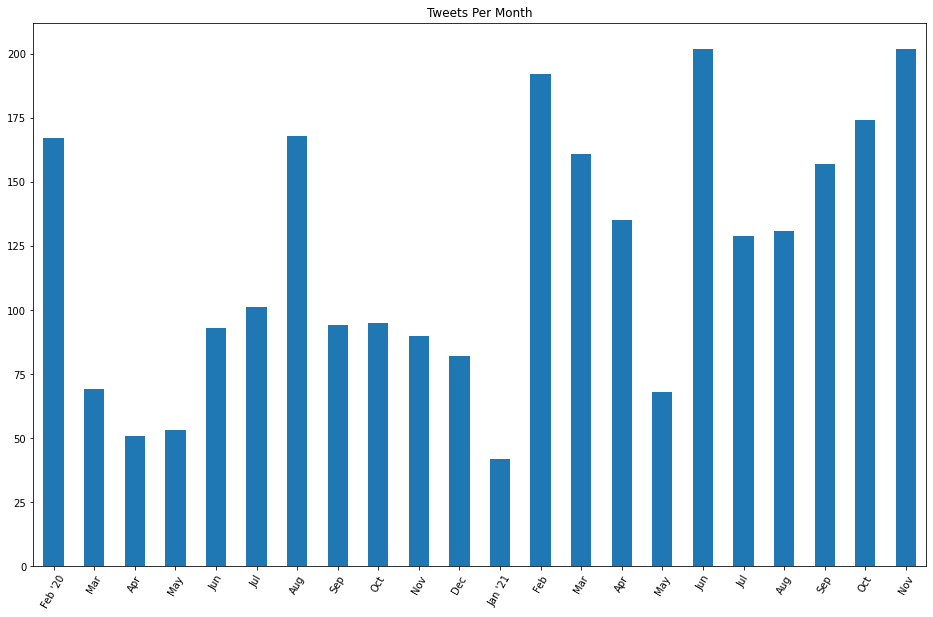

In [20]:
plt.rcParams["figure.figsize"] = (16,10);

ax = (tweets_per_month.loc[:, ["month", 'count']]
                      .plot
                      .bar(x='month', 
                           title = "Tweets Per Month", 
                           legend=False));

months = ("Feb '20", "Mar", "Apr", 'May', "Jun", "Jul", 'Aug', "Sep",
          "Oct", "Nov", "Dec", "Jan '21", "Feb", "Mar", 'Apr', 'May',
          'Jun', 'Jul', 'Aug', "Sep", "Oct", "Nov")

positions = range(len(months))
plt.xticks(positions, months, rotation=60)
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

## Followers by Month

In [21]:
followers_per_month = df_full.groupby(['year','month'])['followersCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
followers_per_month = pd.DataFrame(followers_per_month)
followers_per_month.columns = ['year', 'month', 'count']
followers_per_month

,year,month,count
0,2020,2,483038
1,2020,3,266797
2,2020,4,205600
3,2020,5,241052
4,2020,6,284887
5,2020,7,261856
6,2020,8,353191
7,2020,9,256675
8,2020,10,289272
9,2020,11,187459


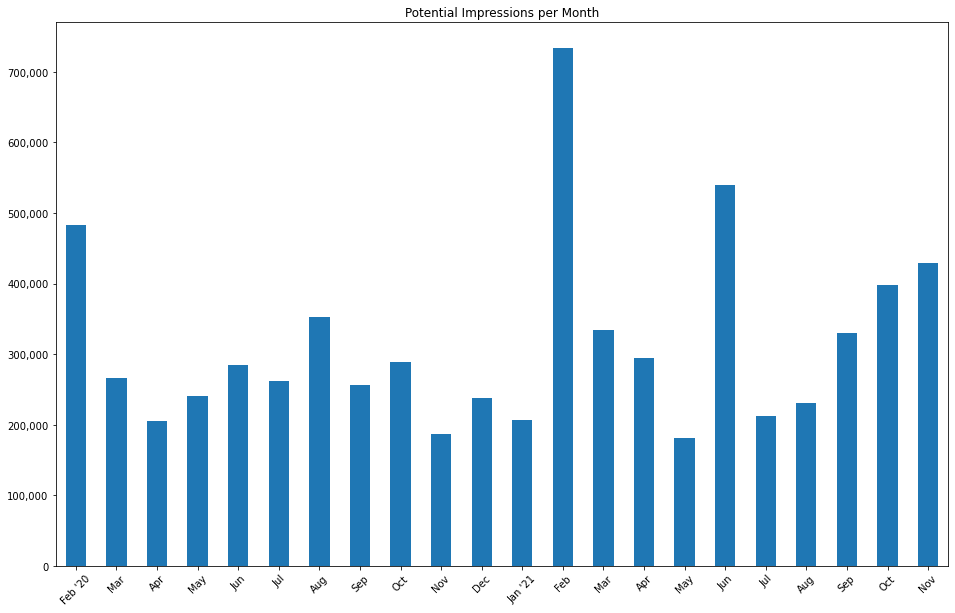

In [22]:
audience = (followers_per_month.loc[:, ['month', 'count']]
                         .plot
                         .bar(x='month',
                              legend=False,
                              title="Potential Impressions per Month"))

audience.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(positions, months, rotation=45);
plt.xlabel("");

audience.figure.savefig('plots/impression_per_month.png')

## Tweets By Day

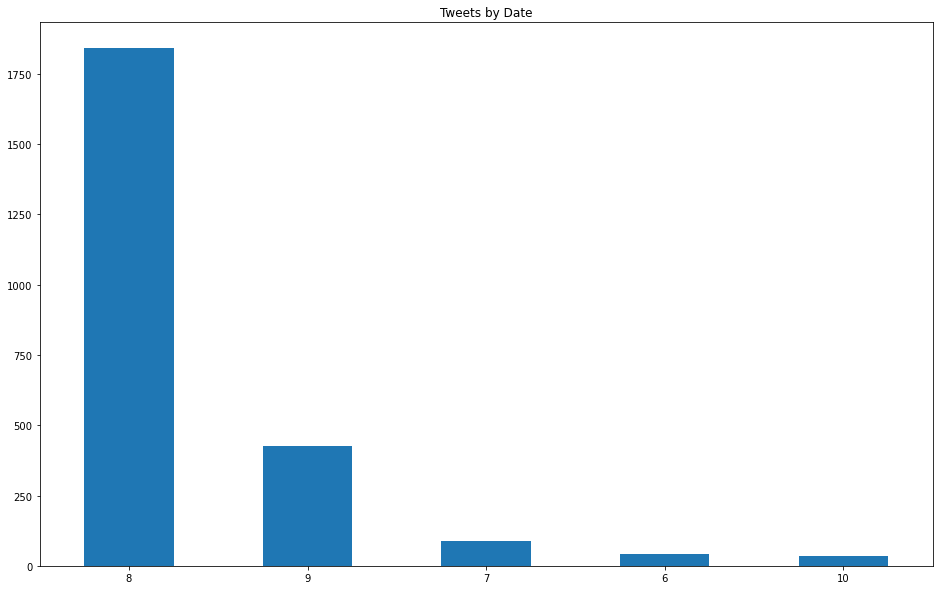

In [23]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

### Retweets per Month

In [24]:
retweets_per_month = df_full.groupby(['year','month'])['retweetCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
retweets_per_month = pd.DataFrame(retweets_per_month)
retweets_per_month.columns = ['year', 'month', 'count']

In [25]:
retweets_per_month

,year,month,count
0,2020,2,519
1,2020,3,173
2,2020,4,112
3,2020,5,127
4,2020,6,210
5,2020,7,277
6,2020,8,392
7,2020,9,200
8,2020,10,222
9,2020,11,146


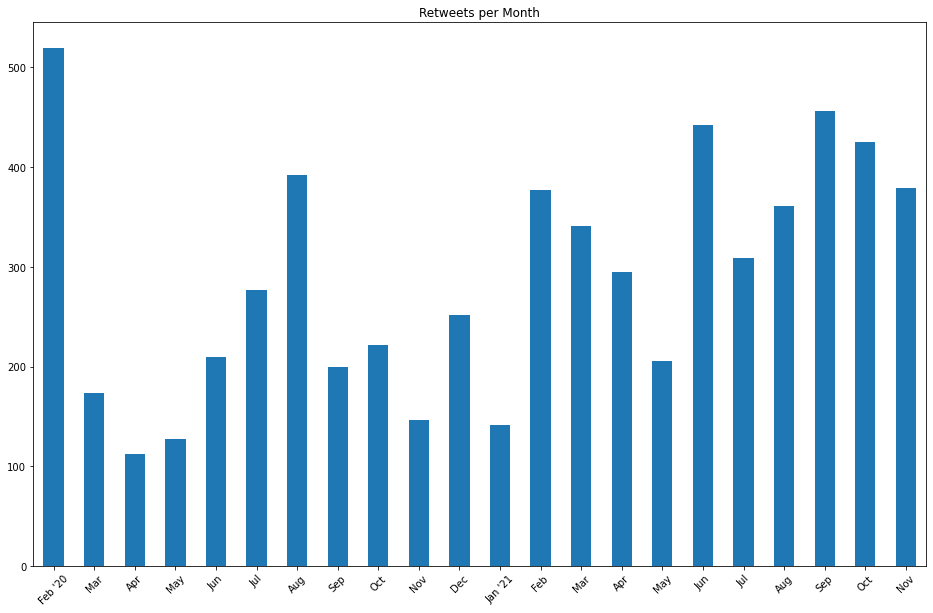

In [26]:
ax3 = (retweets_per_month.loc[:, ['month', 'count']]
                         .plot
                         .bar(x='month',
                              legend=False,
                              title="Retweets per Month"))

plt.xticks(positions, months, rotation=45);
plt.xlabel("");

ax3.figure.savefig('plots/retweets_per_month.png')

## Favorites Per Month

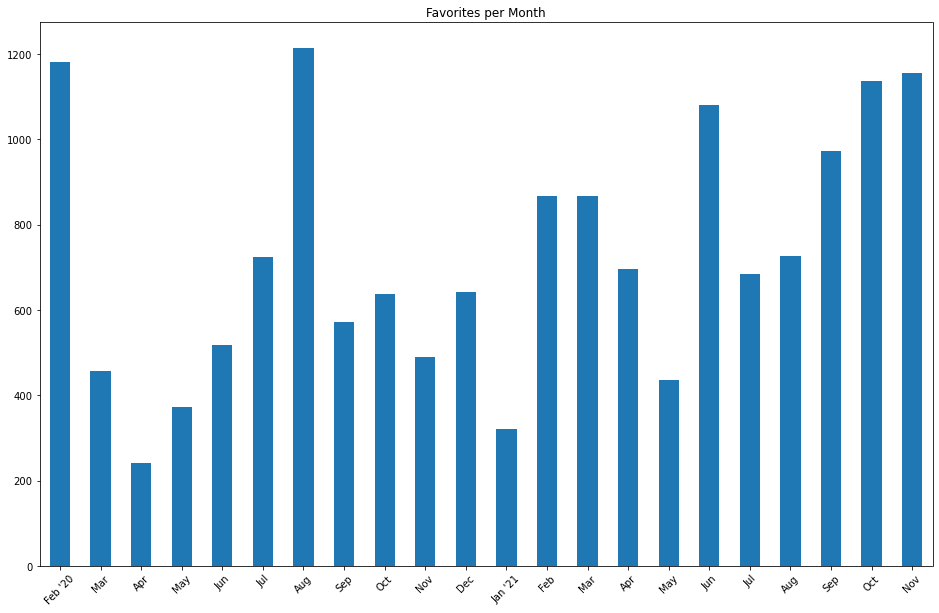

In [27]:
favorites_per_month = df_full.groupby(['year','month'])['likeCount'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

## Unique Users per Month

In [28]:
uniques_per_month = df_full.groupby([df_full['date'].dt.year.rename('year'), 
                                     df_full['date'].dt.month.rename('month')])['username'].nunique().rename('count')
uniques_per_month = pd.DataFrame(uniques_per_month).reset_index()
uniques_per_month

,year,month,count
0,2020,2,90
1,2020,3,38
2,2020,4,27
3,2020,5,31
4,2020,6,54
5,2020,7,58
6,2020,8,71
7,2020,9,49
8,2020,10,47
9,2020,11,37


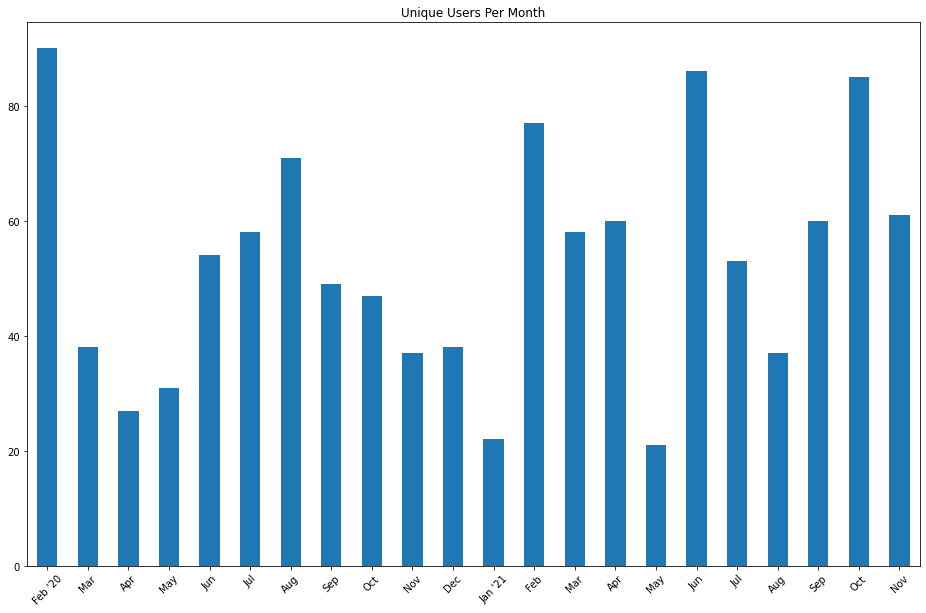

In [29]:
ax5 = (uniques_per_month.loc[:, ["month", 'count']]
                        .plot
                        .bar(x='month', 
                             title = "Unique Users Per Month", 
                             legend=False));

plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax5.figure.savefig('plots/uniques_per_month.png')

## Participants by Country

In [30]:
table = df_full.groupby(['year','month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [31]:
table_wide = table.pivot(index=['year', 'month'], columns=['country'], values=['total']).fillna(method='ffill', axis=0).reset_index()
table_wide.fillna(0, inplace=True)

In [32]:
table_wide.reset_index()

index  year month     total                                        \
country                   Australia Canada Croatia Czech Republic Ecuador   
0           0  2020     2       5.0    5.0     1.0            0.0     0.0   
1           1  2020     3       5.0    5.0     1.0            0.0     1.0   
2           2  2020     4       6.0    5.0     1.0            0.0     1.0   
3           3  2020     5       6.0    6.0     1.0            0.0     1.0   
4           4  2020     6       6.0    7.0     1.0            0.0     1.0   
5           5  2020     7       6.0    9.0     1.0            0.0     1.0   
6           6  2020     8       6.0   19.0     1.0            0.0     1.0   
7           7  2020     9       6.0   23.0     1.0            0.0     1.0   
8           8  2020    10       6.0   23.0     1.0            0.0     1.0   
9           9  2020    11       6.0   29.0     1.0            0.0     1.0   
10         10  2020    12       6.0   35.0     1.0            0.0     1.0   
11         11  2021     1       6.0   36.0     1.0            0.0     1.0   
12         12  2021     2       6.0   48.0     1.0            0.0     1.0   
13         13  2021     3       6.0   54.0     1.0            0.0     1.0   
14         14  2021     4       6.0   61.0     1.0            0.0     1.0   
15         15  2021     5       6.0   65.0     1.0            0.0     1.0   
16         16  2021     6       6.0   70.0     1.0            0.0     1.0   
17         17  2021     7       6.0   71.0     1.0            1.0     1.0   
18         18  2021     8       6.0   72.0     1.0            1.0     1.0   
19         19  2021     9       6.0   76.0     1.0            1.0     1.0   
20         20  2021    10       6.0   79.0     1.0            1.0     1.0   
21         21  2021    11       6.0   83.0     1.0            1.0     1.0   

                        ...                                                \
country France Germany  ... Nigeria Poland South Africa South Korea Spain   
0          0.0     1.0  ...     0.0    0.0          0.0         0.0   0.0   
1          0.0     1.0  ...     0.0    0.0          0.0         0.0   0.0   
2          0.0     1.0  ...     0.0    0.0          0.0         0.0   0.0   
3          0.0     1.0  ...     0.0    0.0          0.0         0.0   0.0   
4          0.0     2.0  ...     3.0    0.0          0.0         0.0   0.0   
5          2.0     4.0  ...     4.0    2.0          0.0         0.0   5.0   
6          2.0     4.0  ...     4.0    4.0          0.0         0.0   5.0   
7          2.0     4.0  ...     4.0    4.0          0.0         0.0   7.0   
8          2.0     4.0  ...     4.0    4.0          0.0         0.0  11.0   
9          2.0     4.0  ...     4.0    4.0          0.0         0.0  11.0   
10         2.0     6.0  ...     4.0    4.0          0.0         0.0  11.0   
11         2.0     6.0  ...     4.0    4.0          0.0         0.0  11.0   
12         2.0     6.0  ...     4.0    4.0          0.0        13.0  11.0   
13         2.0     6.0  ...     4.0    4.0          0.0        17.0  11.0   
14         2.0     7.0  ...     4.0    4.0          0.0        25.0  11.0   
15         2.0     7.0  ...     4.0    4.0          0.0        25.0  11.0   
16         2.0     8.0  ...     4.0    4.0          0.0        29.0  12.0   
17         2.0     8.0  ...     4.0    4.0          0.0        32.0  12.0   
18         2.0     9.0  ...     4.0    4.0          0.0        32.0  12.0   
19         2.0     9.0  ...     4.0    4.0          2.0        34.0  12.0   
20         2.0     9.0  ...     4.0    4.0          2.0        38.0  12.0   
21         2.0     9.0  ...     4.0    4.0          2.0        42.0  12.0   

                                                                          
country Sweden United Arab Emirates United Kingdom United States Vanuatu  
0          0.0                  0.0           13.0          73.0     0.0  
1          0.0                  0.0           20.0         108.0     0.0  
2         

In [33]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [34]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [35]:
table_wide.columns

Index(['', '', 'Australia', 'Canada', 'Croatia', 'Czech Republic', 'Ecuador',
       'France', 'Germany', 'India', 'Ireland', 'Italy', 'Japan', 'Malaysia',
       'New Zealand', 'Nigeria', 'Poland', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vanuatu'],
      dtype='object')

In [36]:
table_wide.columns.values[[0, 1]] = ['year', 'month']

In [37]:
table_wide

,year,month,Australia,Canada,Croatia,Czech Republic,Ecuador,France,Germany,India,...,Nigeria,Poland,South Africa,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
0,2020,2,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
0,2020,2,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
3,2020,5,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
3,2020,5,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
4,2020,6,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0
4,2020,6,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0


In [38]:
mon_num = list(range(1,13))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_dic = dict(zip(mon_num, mon_names))
# df['col1'].replace(di, inplace=True)
table_wide['month'] = table_wide['month'].replace(months_dic)
table_wide

,year,month,Australia,Canada,Croatia,Czech Republic,Ecuador,France,Germany,India,...,Nigeria,Poland,South Africa,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
0,2020,February,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
0,2020,February,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
3,2020,May,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
3,2020,May,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
4,2020,June,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0
4,2020,June,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0


In [39]:
table_wide['month_year'] = table_wide['month']+" "+table_wide['year'].astype(str)
table_wide = table_wide.drop(columns=['month', 'year'])

In [40]:
table_wide.set_index('month_year')

,Australia,Canada,Croatia,Czech Republic,Ecuador,France,Germany,India,Ireland,Italy,...,Nigeria,Poland,South Africa,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
month_year,,,,,,,,,,,,,,,,,,,,,
February 2020,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
February 2020,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
May 2020,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
May 2020,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
June 2020,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0


In [41]:
# bcr.bar_chart_race(table_wide)

In [42]:
# table_wide.columns

# Current Month

In [44]:
df_full.columns

Index(['url_x', 'date', 'content', 'renderedContent', 'id_x', 'user',
       'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl',
       'sourceLabel', 'media', 'retweetedTweet', 'quotedTweet',
       'mentionedUsers', 'username', 'id_y', 'displayname', 'location',
       'created', 'followersCount', 'friendsCount', 'url_y', 'verified',
       'geotext', 'city', 'country', 'year', 'month', 'day'],
      dtype='object')

In [103]:
keep = ['username', 'displayname','url_y', 'location', 
        'followersCount', 'city',
        'country', 'year', 'month', 'day']

In [123]:
nov_users = df_full.query('year == 2021 & month == 11').loc[:, keep]
nov_users

,username,displayname,url_y,location,followersCount,city,country,year,month,day
0,schisnell,Steve Chisnell,https://twitter.com/schisnell,"Waterford, MI",890,Waterford,United States,2021,11,9
2,LookBehindPod,LookBehindTheLook,https://twitter.com/LookBehindPod,"New York, NY",56,New York,United States,2021,11,9
4,Namely90s,Namely 90s Podcast,https://twitter.com/Namely90s,"West Coast, USA",544,NaN,United States,2021,11,9
5,MatthewWinner,Matthew C. Winner,https://twitter.com/MatthewWinner,Maryland,15864,Maryland,United States,2021,11,9
6,Namely90s,Namely 90s Podcast,https://twitter.com/Namely90s,"West Coast, USA",544,NaN,United States,2021,11,9
...,...,...,...,...,...,...,...,...,...,...
219,musciguy,Garret Godfrey ☕️📖🎙🎧📚,https://twitter.com/musciguy,"Phoenix, AZ",503,Phoenix,United States,2021,11,2
220,musciguy,Garret Godfrey ☕️📖🎙🎧📚,https://twitter.com/musciguy,"Phoenix, AZ",503,Phoenix,United States,2021,11,2
221,musciguy,Garret Godfrey ☕️📖🎙🎧📚,https://twitter.com/musciguy,"Phoenix, AZ",503,Phoenix,United States,2021,11,2
222,ODParlayHour,The ODPH Podcast,https://twitter.com/ODParlayHour,"Binghamton, NY",5833,Binghamton,United States,2021,11,2


In [124]:
nov_users['count'] = nov_users.groupby('username')['username'].transform('count')
nov_users.drop_duplicates(subset=['username'], keep='first', inplace=True) 
nov_users.sort_values('count', ascending=False).head(10)

,username,displayname,url_y,location,followersCount,city,country,year,month,day,count
10,OracleofDusk,MJ Bailey,https://twitter.com/OracleofDusk,NaN,1017,NaN,NaN,2021,11,9,31
84,musciguy,Garret Godfrey ☕️📖🎙🎧📚,https://twitter.com/musciguy,"Phoenix, AZ",503,Phoenix,United States,2021,11,8,27
33,KelliMadden80,Kelli Madden,https://twitter.com/KelliMadden80,"South Carolina, USA",3687,NaN,United States,2021,11,8,9
58,Gtsus_Pod,Gather The Suspects Pod,https://twitter.com/Gtsus_Pod,Cardiff,1020,Cardiff,NaN,2021,11,8,9
28,Zed1Pod,Zed1Pod,https://twitter.com/Zed1Pod,"Faringdon, England",1325,NaN,United Kingdom,2021,11,9,9
40,realnealveglio,Neal Veglio,https://twitter.com/realnealveglio,"Oxford, England",3415,Oxford,United Kingdom,2021,11,8,8
62,ODParlayHour,The ODPH Podcast,https://twitter.com/ODParlayHour,"Binghamton, NY",5833,Binghamton,United States,2021,11,8,8
39,HealthTalksPod,Health Talks With JD,https://twitter.com/HealthTalksPod,Arkham Asylum,856,NaN,NaN,2021,11,8,6
36,TheIndustry13,The Industry,https://twitter.com/TheIndustry13,"South Florida, USA",370,NaN,United States,2021,11,8,6
156,ItTakesTwo_pod,It Takes Two,https://twitter.com/ItTakesTwo_pod,New Zealand,194,NaN,New Zealand,2021,11,8,6


In [115]:
nov_users.drop(['year', 'month', 'day'], axis=1).sort_values("count", ascending=False).to_csv('data/nov_2021_users.csv', index=False)

In [116]:
nov_all = df_full.query('year == 2021 & month == 11')

In [120]:
def get_data(tweets, users):
    tweet_table = tweets.groupby('username').size().reset_index(name="tweets")
    tweets_total = tweets.shape[0]
    unique_users = tweets["username"].nunique()
    sum_followers = sum(users.followersCount)
    unique_countries = tweets.country.nunique()
    median_tweet = np.median(tweet_table.tweets)
    avg_retweats = np.mean(tweets.retweetCount)
    avg_favorite = np.mean(tweets.likeCount)
    print(f"{tweets_total}: Tweets using the hashtag #PodRevDay")
    print(f"{unique_users}: People participated in #PodRevDay")
    print(f"{sum_followers:,d}: Followers of participants in #PodRevDay")
    print(f"{unique_countries}: Minimum number of countries with participants")
    print(f"{avg_favorite:.2f}: Average Number of people liking a tweet about #PodRevDay")
    print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
    print(f"{median_tweet:.0f}: Median number of tweets per user")

In [121]:
get_data(nov_all, nov_users)

202: Tweets using the hashtag #PodRevDay
61: People participated in #PodRevDay
138,259: Followers of participants in #PodRevDay
6: Minimum number of countries with participants
5.72: Average Number of people liking a tweet about #PodRevDay
1.88: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user
